In [ ]:
import mne
import matplotlib.pyplot as plt

In [9]:
raw = mne.io.read_raw_edf('/home/mcesped/scratch/Results/seegprep/hipp_run/work/sub-002/ses-002/ieeg/sub-002_ses-002_task-full_rec-clip_run-01_clip-01_ieeg.edf', preload=True)

Extracting EDF parameters from /home/mcesped/scratch/Results/seegprep/hipp_run/work/sub-002/ses-002/ieeg/sub-002_ses-002_task-full_rec-clip_run-01_clip-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245759  =      0.000 ...   239.999 secs...


/tmp/ipykernel_30487/2666890318.py:1: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf('/home/mcesped/scratch/Results/seegprep/hipp_run/work/sub-002/ses-002/ieeg/sub-002_ses-002_task-full_rec-clip_run-01_clip-01_ieeg.edf', preload=True)


In [21]:
raw.ch_names[0:5]

['LAFr1', 'LAFr2', 'LAFr3', 'LAFr4', 'LAFr5']

Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33793 samples (33.001 s)



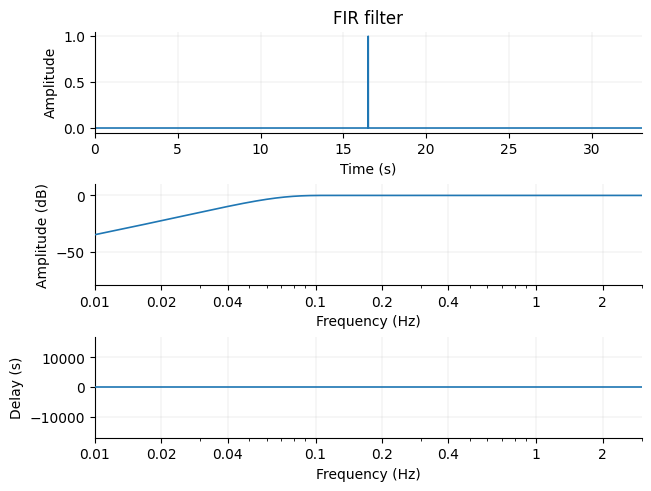

In [10]:
filter_params = mne.filter.create_filter(
    raw.get_data(), raw.info["sfreq"], l_freq=0.1, h_freq=None
)
_ = mne.viz.plot_filter(filter_params, raw.info["sfreq"], flim=(0.01, 3))

NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_30487/577015308.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = mne.viz.plot_raw_psd(raw, picks=['LAFr1'])


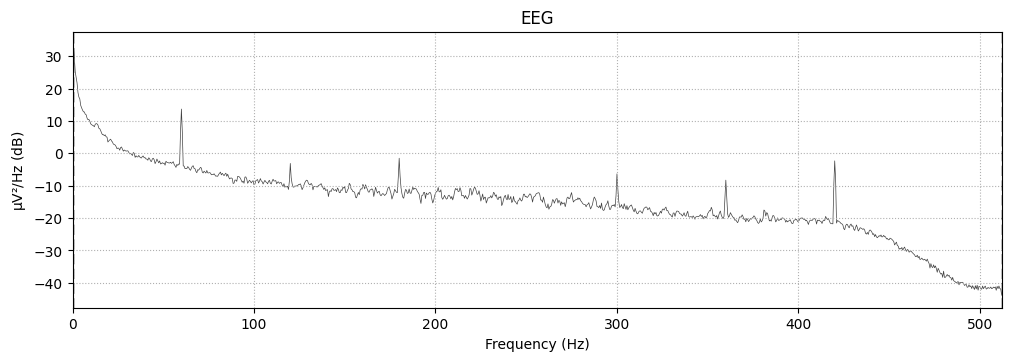

In [23]:
_ = mne.viz.plot_raw_psd(raw, picks=['LAFr1'])

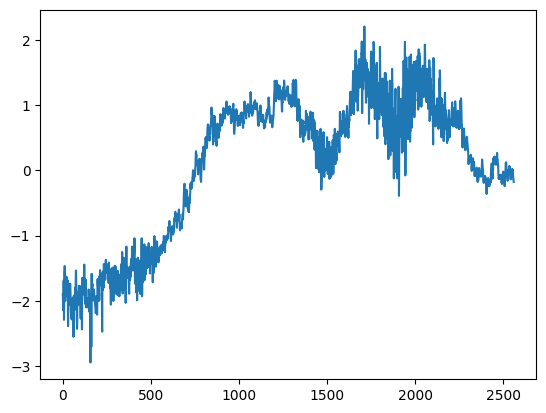

In [39]:
plt.plot(raw.get_data()[0,0:2560].squeeze()*10000)
plt.show()

In [25]:
raw_dn = raw.copy().resample(200)
raw_dn.info

Measurement date,"December 06, 2018 10:47:07 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,148 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


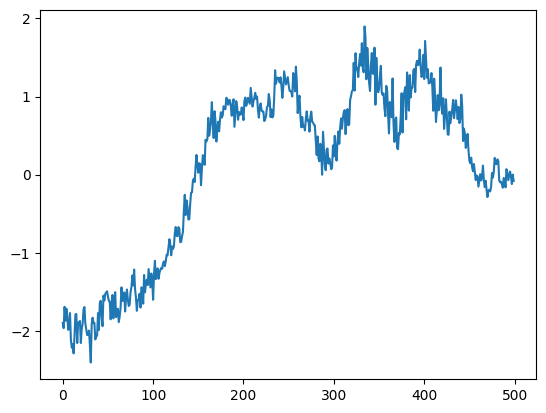

In [38]:
plt.plot(raw_dn.get_data()[0,0:500].squeeze()*10000)
plt.show()

NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 10.240 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_30487/1825350303.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = mne.viz.plot_raw_psd(raw_dn, picks=['LAFr1'], fmax=100)


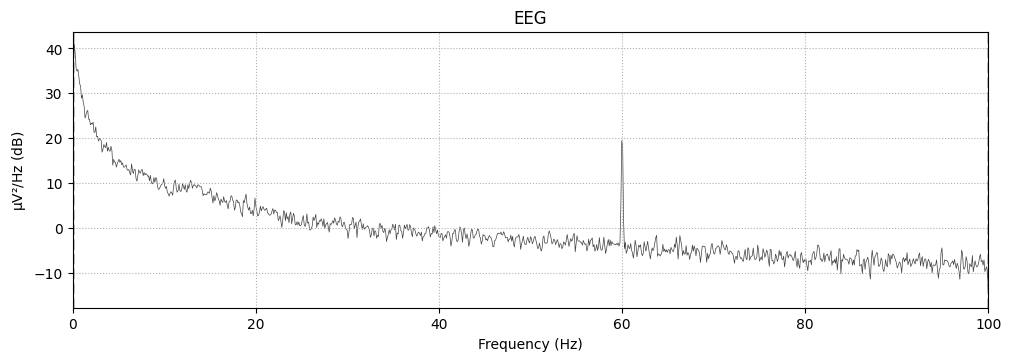

In [28]:
_ = mne.viz.plot_raw_psd(raw_dn, picks=['LAFr1'], fmax=100)

In [11]:
raw_highpass = raw.copy().filter(l_freq=0.1, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33793 samples (33.001 s)



In [12]:
len(raw)/1024

240.0

In [13]:
len(raw_highpass)/240

1024.0